<h3>Word Vectors, Embeddings</h3>

Word vectors are numerical representations of words in a multi-dimensional space, where similar words have similar representations. These vectors allow computers to understand relationships between words in a way that captures their meanings, similarities, and contexts.

1. Gensim word vector visualization of various word vectors

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("ggplot")
from sklearn.decomposition import PCA
import gensim.downloader as api
from gensim.models import KeyedVectors

In [2]:
model = api.load("glove-wiki-gigaword-100")
print(type(model))

[==================================================] 100.0% 128.1/128.1MB downloaded
<class 'gensim.models.keyedvectors.KeyedVectors'>


In [3]:
model["bread"]

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

In [4]:
model['croissant']

array([-0.25144  ,  0.52157  , -0.75452  ,  0.28039  , -0.31388  ,
        0.274    ,  1.1971   , -0.10519  ,  0.82544  , -0.33398  ,
       -0.21417  ,  0.22216  ,  0.14982  ,  0.47384  ,  0.41984  ,
        0.69397  , -0.25999  , -0.44414  ,  0.58296  , -0.30851  ,
       -0.076455 ,  0.33468  ,  0.28055  , -0.99012  ,  0.30349  ,
        0.39128  ,  0.031526 , -0.095395 , -0.004745 , -0.81347  ,
        0.27869  , -0.1812   ,  0.14632  , -0.42186  ,  0.13857  ,
        1.139    ,  0.14925  , -0.051459 ,  0.37875  , -0.2613   ,
        0.011081 , -0.28881  , -0.38662  , -0.3135   , -0.1954   ,
        0.19248  , -0.52995  , -0.40674  , -0.25159  ,  0.06272  ,
       -0.32724  ,  0.28374  , -0.2155   , -0.061832 , -0.50134  ,
        0.0093959,  0.30715  ,  0.3873   , -0.74554  , -0.45947  ,
        0.40032  , -0.1378   , -0.26968  , -0.3946   , -0.64876  ,
       -0.47149  , -0.085536 ,  0.092795 , -0.034018 , -0.61906  ,
        0.19123  ,  0.20563  ,  0.29056  , -0.010908 ,  0.1531

In [5]:
model.most_similar("kenya")

[('tanzania', 0.8234297037124634),
 ('uganda', 0.8068469166755676),
 ('zimbabwe', 0.7562630772590637),
 ('zambia', 0.7488762140274048),
 ('nigeria', 0.7438858151435852),
 ('africa', 0.7278396487236023),
 ('ethiopia', 0.7259960174560547),
 ('kenyan', 0.7218081951141357),
 ('sudan', 0.7171735763549805),
 ('lanka', 0.7084217667579651)]

In [6]:
model.most_similar("banana")

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [7]:
model.most_similar(negative="banana")

[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.4588957726955414),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947238922119)]

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [9]:
def analogy(x1, x2, y1):
  result = model.most_similar(positive=[y1, x2], negative=[x1])
  return result[0][0]
analogy("man", "king", "woman")

'queen'

In [10]:
analogy('tall', 'tallest', 'long')

'longest'

In [11]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [12]:
def display_pca_scatterplot(model, words=None, sample=0):
  if words == None:
    if sample > 0:
      words = np.random.choice(list(model.vocab.keys()),sample)
    else:
      words = [ word for word in model.vocab]
  word_vectors = np.array([model[w] for w in words])
  twodim = PCA().fit_transform(word_vectors)[:, :2]
  plt.figure(figsize=(6, 6))
  plt.scatter(twodim[:, 0], twodim[:, 1],edgecolors="k", c="r")
  for word, (x, y) in zip(words, twodim):
    plt.annotate(word, (x, y), xytext=(x+0.05, y+0.05))

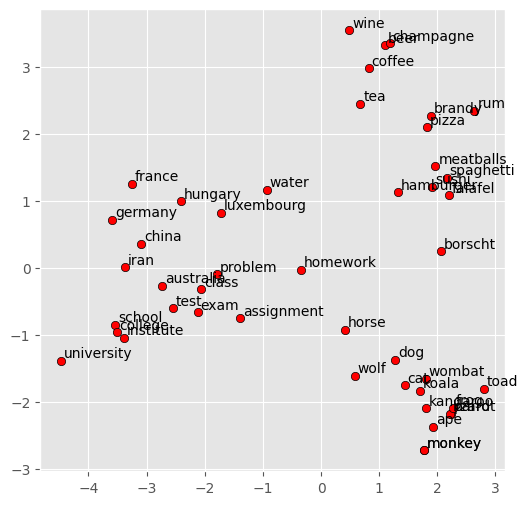

In [15]:
display_pca_scatterplot(model,
    ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
        'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
        'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
        'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
        'france', 'germany', 'hungary', 'luxembourg', 'australia', 'china', 'iran',
        'homework', 'assignment', 'problem', 'exam', 'test', 'class',
        'school', 'college', 'university', 'institute'])

2. <h3>Word Embedding using Pytorch</h3>

In [16]:
#importing libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [17]:
word_to_ix = {"hello":0, "world": 1}
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
hello_embed

tensor([[ 0.6614,  0.2669,  0.0617,  0.6213, -0.4519]],
       grad_fn=<EmbeddingBackward0>)

<h3>N-Gram Modelling</h3>
An N-Gram model is a fundamental concept in Natural Language Processing (NLP) used for predicting the next word in a sequence or analyzing text data. It is based on the probability of sequences of words occurring together.


In [21]:
#compute the loss function and update the parameters with backpropagation
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.
# Each tuple is ([ word_i-CONTEXT_SIZE, ..., word_i-1 ], target word)
ngrams = [
    (
        [test_sentence[i - j - 1] for j in range(CONTEXT_SIZE)],
        test_sentence[i]
    )
    for i in range(CONTEXT_SIZE, len(test_sentence))
]
# Print the first 3, just so you can see what they look like.
print(ngrams[:3])
vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}
class NGramLanguageModeler(nn.Module):
  def __init__(self, vocab_size, embedding_dim, context_size):
    super(NGramLanguageModeler, self).__init__()
    self.embeddings = nn.Embedding(vocab_size, embedding_dim)
    self.linear1 = nn.Linear(context_size* embedding_dim, 128)
    self.linear2 = nn.Linear(128, vocab_size)
  def forward(self, inputs):
    embeds = self.embeddings(inputs).view(1, -1)
    out = F.relu(self.linear1(embeds))
    out = self.linear2(out)
    log_probs = F.log_softmax(out, dim=1)
    return log_probs
losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0
    for context, target in ngrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

# To get the embedding of a particular word, e.g. "beauty"
print(model.embeddings.weight[word_to_ix["beauty"]])

[(['forty', 'When'], 'winters'), (['winters', 'forty'], 'shall'), (['shall', 'winters'], 'besiege')]
[518.4437794685364, 515.8960280418396, 513.3667306900024, 510.8526837825775, 508.35433077812195, 505.86949467658997, 503.3973534107208, 500.936546087265, 498.4885251522064, 496.05060958862305]
tensor([ 0.6704, -0.4168,  0.5024, -0.4278, -0.9329, -0.5259,  0.7142, -1.1585,
        -1.8326, -2.0152], grad_fn=<SelectBackward0>)


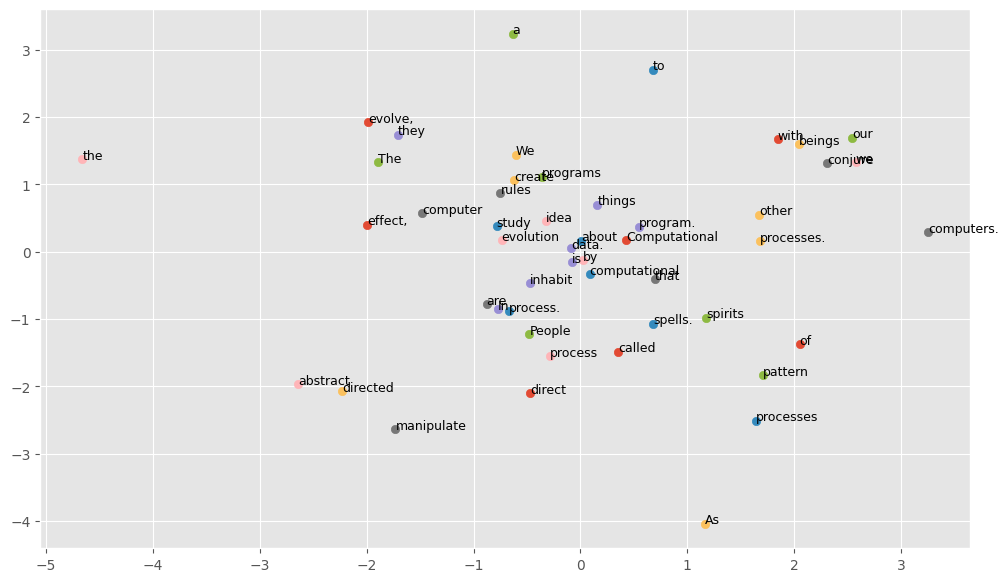

In [32]:
#visualizing embeddings
#using PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract embeddings from the trained model
word_embeddings = model.embeddings.weight.detach().numpy()

#reduce dimensions from 10D TO 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(word_embeddings)

plt.figure(figsize=(12, 7))
for word, (x, y) in zip(word_to_ix.keys(), reduced_embeddings):
  plt.scatter(x, y)
  plt.text(x, y, word, fontsize=9)


🔹 Expected Output
-  Words with similar meanings should appear closer together in the plot.
-  Common words like "the", "a", "in" may cluster separately from content words like "beauty", "youth".



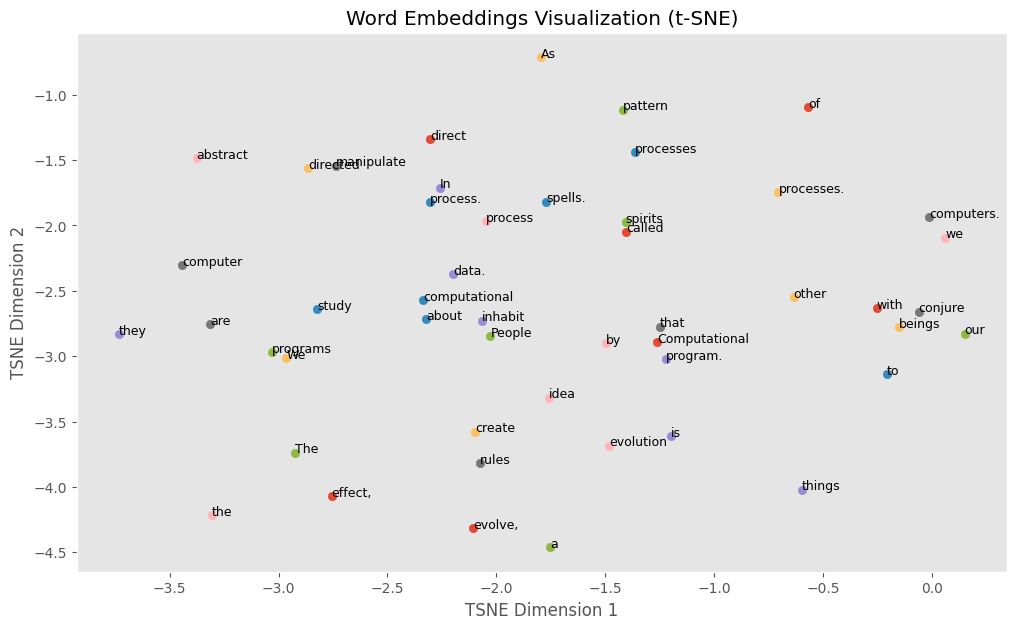

In [33]:
#using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(word_embeddings)
plt.figure(figsize=(12, 7))
for word, (x, y) in zip(word_to_ix.keys(), reduced_embeddings_tsne):
  plt.scatter(x,y)
  plt.text(x, y, word, fontsize=9)
  plt.title("Word Embeddings Visualization (t-SNE)")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.grid()
plt.show()

<h3>Continous Bag-of-Words(CBOW)</h3>
It is a model that tries to predict words given the context of a few words before and a few words after the target word.

In [22]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()
vocab = set(raw_text)
vocab_size = len(vocab)
word_to_ix = {word:i for i, word in enumerate(vocab)}
data = []
for i in range(CONTEXT_SIZE, len(raw_text) - CONTEXT_SIZE):
  context = (
      [raw_text[i - j - 1] for j in range(CONTEXT_SIZE)]
      + [raw_text[i + j + 1] for j in range(CONTEXT_SIZE)]
  )
  target = raw_text[i]
  data.append((context, target))
print(data[:5])

class CBOW(nn.Module):
  def __init__(self):
    pass
  def forward(self, inputs):
    pass
def make_context_vector(context, word_to_ix):
  idxs = [word_to_ix[w] for w in context]
  return torch.tensor(idxs, dtype=torch.long)

make_context_vector(data[0][0], word_to_ix)

[(['are', 'We', 'to', 'study'], 'about'), (['about', 'are', 'study', 'the'], 'to'), (['to', 'about', 'the', 'idea'], 'study'), (['study', 'to', 'idea', 'of'], 'the'), (['the', 'study', 'of', 'a'], 'idea')]


tensor([38, 18, 15,  1])

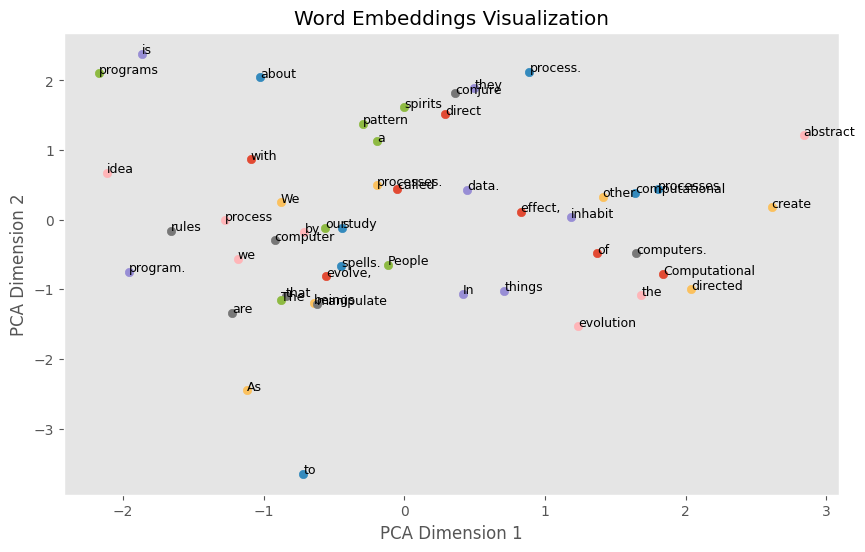

In [28]:
#visualizing cbow embeddings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create sample word embeddings (random for now)
embedding_dim = 10
word_embeddings = {word: torch.randn(embedding_dim) for word in vocab}

# Convert to numpy for PCA
word_vectors = torch.stack(list(word_embeddings.values())).detach().numpy()

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot the words
plt.figure(figsize=(10, 6))
for word, (x, y) in zip(word_embeddings.keys(), reduced_vectors):
    plt.scatter(x, y)
    plt.text(x, y, word, fontsize=9)

plt.title("Word Embeddings Visualization")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.grid()
plt.show()
